>2 0.719 (0.045)
>3 0.825 (0.033)
>4 0.876 (0.028)
>5 0.887 (0.033)
>6 0.887 (0.033)
>7 0.885 (0.027)
>8 0.886 (0.029)
>9 0.884 (0.025)


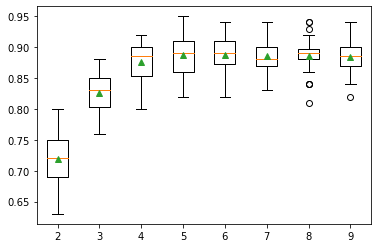

In [10]:
# explore the number of selected features for RFE
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
 
# get the dataset
def get_dataset():
	X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
	return X, y

# get a list of models to evaluate
def get_models():
	models = dict()
	for i in range(2, 10):
		rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=i)
		model = DecisionTreeClassifier()
		models[str(i)] = Pipeline(steps=[('s',rfe),('m',model)])
	return models

# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores

# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [ ]:
skb = SelectKBest(score_func=mutual_info_regression, k=100) 
skb.fit(df_prep_train[col_sensor], df_prep_train['y'])
select_features_kbest = skb.get_support()
col_featsIDX = pd.Index(df_prep_train[col_sensor].columns.tolist())
col_selected_mutual = col_featsIDX[select_features_kbest]

In [2]:
# automatically choose the number of features
rfe = RFECV(estimator=DecisionTreeClassifier())

NameError: name 'RFECV' is not defined

In [3]:
rfe

NameError: name 'rfe' is not defined